# SC1015  Data Science Project 
# Title: Heart Attack Analysis & Prediction
### Authors: Ghate Harshal Shrikant, Solis Aaron Mari Santos, Ethan Wong Kee Jann

## What will you learn from this project?
* EDA
* Missing Value Analysis
* Categoric and Numeric Features
* Standardization
* Box - Swarm - Cat - Correlation Plot Analysis
* Outlier Detection
* Modelling and Tuning Machine Learning Model 

## Introduction
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood. 
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle. 
* Coronary artery disease (CAD) is the main cause of heart attack.

![hear.JPG](hear.JPG)

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Missing Value Analysis](#4)
1. [Unique Value Analysis](#5)
1. [Categorical Feature Analysis](#6)
1. [Numeric Feature Analysis](#7)
1. [Standardization](#8)
1. [Box Plot Analysis](#9)
1. [Swarm Plot Analysis](#10)
1. [Cat Plot Analysis](#11)
1. [Correlation Analysis](#12)
1. [Outlier Detection](#13)
1. [Modelling](#14)
    1. Encoding Categorical Columns
    1. Scaling
    1. Train/Test Split
    1. Logistic Regression
    1. Logistic Regression Hyperparameter Tuning
1. [Conclusion](#15)

<a id="1"></a>
#### Python Libraries
* In this section, we import used libraries during this kernel.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

## Section 1: Data Preparation & Cleaning
* In this section, we read heart.csv and clean the dataset

First, we read our csv dataset into a pandas dataframe. <br>
We then inspect df.shape to see the number of rows and columns of the raw dataset. <br>
We see that there are, before any data processing, 303 rows and 14 columns.

In [2]:
# read data 
df = pd.read_csv("heart6.csv", na_values = "?")



print("Number of rows: ",df.shape[0])
print("\nNumber of columns: ", df.shape[1])

Number of rows:  347

Number of columns:  14


Next, we use df.head() to see the columns.

Response variable: output 
Numeric predictors: 
Categorical predictors: 

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,43.0,1.0,0.0,115,303.0,0.0,1.0,181.0,0,1.2,1.0,0.0,2.0,1.0
1,62.0,0.0,0.0,124,209.0,0.0,1.0,163.0,0,0.0,2.0,0.0,2.0,1.0
2,50.0,1.0,0.0,150,243.0,0.0,0.0,128.0,0,2.6,1.0,0.0,3.0,0.0
3,54.0,0.0,1.0,132,288.0,1.0,0.0,159.0,1,0.0,2.0,1.0,2.0,1.0
4,NaN,0.0,2.0,137,264.0,1.0,2.0,NaN,1,0.8,1.0,3.0,1.0,1.0


In [4]:
# describe basic statistics of data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,344.000000,342.000000,346.000000,347.000000,346.000000,345.000000,345.000000,343.00000,347.000000,345.000000,344.000000,344.000000,345.000000,344.000000
mean,54.799419,0.675439,0.985549,131.824207,247.193642,0.153623,0.565217,148.80758,0.331412,1.019710,1.392442,0.767442,2.284058,0.546512
std,8.913769,0.468897,1.028475,17.377838,50.279855,0.361111,0.557149,22.63887,0.471401,1.135738,0.615685,1.040570,0.619833,0.498557
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.750000,0.000000,0.000000,120.000000,213.000000,0.000000,0.000000,134.00000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.00000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,61.250000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,164.50000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.00000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       344 non-null    float64
 1   sex       342 non-null    float64
 2   cp        346 non-null    float64
 3   trtbps    347 non-null    int64  
 4   chol      346 non-null    float64
 5   fbs       345 non-null    float64
 6   restecg   345 non-null    float64
 7   thalachh  343 non-null    float64
 8   exng      347 non-null    int64  
 9   oldpeak   345 non-null    float64
 10  slp       344 non-null    float64
 11  caa       344 non-null    float64
 12  thall     345 non-null    float64
 13  output    344 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 38.1 KB


<a id="4"></a>
#### Missing Value Analysis
The missing value analysis indicates that the dataset is complete with zero missing entries across all features, ensuring robustness for subsequent processing stages.

In [6]:
df.isnull().sum()


age         3
sex         5
cp          1
trtbps      0
chol        1
fbs         2
restecg     2
thalachh    4
exng        0
oldpeak     2
slp         3
caa         3
thall       2
output      3
dtype: int64

### Data Cleaning
We will start by removing rows with '?' and duplicate rows 

In [7]:
# Drop rows with any missing values
df = df.dropna()
df = df.drop_duplicates()
# Assuming 'df' is your original DataFrame
# List of numerical variables
numerical_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# List of categorical variables
# Replace 'sex', 'cp', etc., with your actual categorical column names
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [8]:
# outlier detection
for i in numerical_vars:
    
    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape)

Old shape:  (302,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (302, 14)
Old shape:  (302,)
(array([ 94, 208]),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([250]),) -- (array([], dtype=int64),)
New shape:  (299, 14)
Old shape:  (299,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (299, 14)
Old shape:  (299,)
(array([154, 284]),) -- (array([], dtype=int64),)
New shape:  (297, 14)


## Section 2: Exploratory Data Analysis

## 2a: Numeric EDA
1. Univariate non-graphical
2. Univariate graphical
3. Multivariate graphical & nongraphical

1. **Univariate Non-graphical** <br>
For this section, we look at the statistical insights of our various numerical data types including the response variable. <br>
This is primarily to check for outliers by comparing the max/min against median for respective columns.

In [13]:
numerical_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']


# Separate the DataFrames
numeric_data = df[numerical_vars]
categoric_data = df[categorical_vars]

# Get statistical summary of numerical data
numerical_summary = numeric_data.describe().round(2)

# Display the summaries
numerical_summary



,age,trtbps,chol,thalachh,oldpeak
count,297.00,297.00,297.00,297.00,297.00
mean,54.52,131.58,246.70,149.37,1.05
std,9.00,17.64,51.88,22.94,1.17
min,29.00,94.00,126.00,71.00,0.00
25%,48.00,120.00,211.00,133.00,0.00
50%,56.00,130.00,242.00,152.00,0.80
75%,61.00,140.00,275.00,166.00,1.60
max,77.00,200.00,564.00,202.00,6.20


 2. **Univariate Graphical** <br>
In this subsection, we explore the distributions and patterns of our numeric datatypes (age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output)

Furthermore, we examine the skewness and kurtosis of each numeric dataset.<br><br>
Skewness indicates the skewing of the distribution, with negative values suggesting a left skew and positive values indicating a right skew, while a skewness of 0 represents a normal distribution. A skewness below -1 or above 1 signifies heavy skewing.<br><br>
Kurtosis indicates the presence of outliers in the distribution. <br><br>
A kurtosis of 3 denotes a normal distribution, with values higher than 3 indicating more outliers towards the extreme ends and values lower than 3 suggesting fewer outliers than expected.

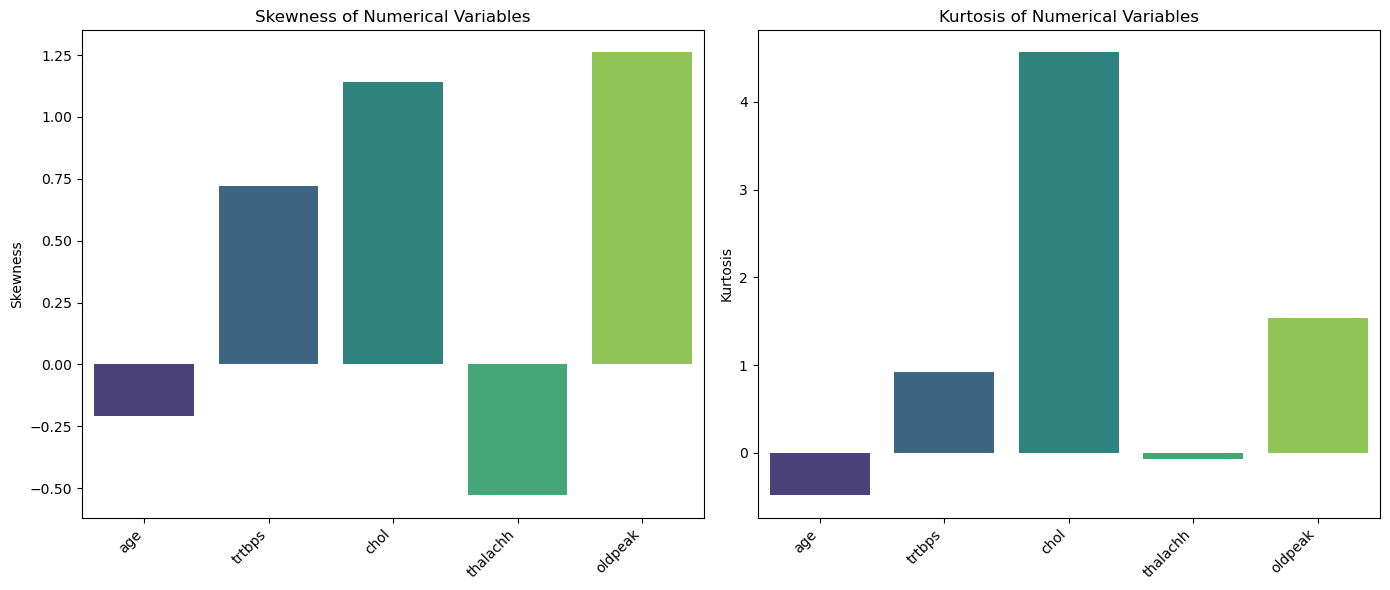

In [14]:

# Lists to store skewness and kurtosis
skewness = []
kurtosis = []
columns = []

# Calculate skewness and kurtosis for each column
for col in numeric_data.columns:
    sk = numeric_data[col].astype(float).skew()
    kt = numeric_data[col].astype(float).kurt()
    
    # Append the values and column name
    skewness.append(sk)
    kurtosis.append(kt)
    columns.append(col)

# Create a DataFrame to hold the skewness and kurtosis values
sk_kt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis}, index=columns)

# Plotting
plt.figure(figsize=(14, 6))

# Skewness plot
plt.subplot(1, 2, 1)
sns.barplot(x=sk_kt_df.index, y=sk_kt_df['Skewness'], palette='viridis')
plt.title('Skewness of Numerical Variables')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Kurtosis plot
plt.subplot(1, 2, 2)
sns.barplot(x=sk_kt_df.index, y=sk_kt_df['Kurtosis'], palette='viridis')
plt.title('Kurtosis of Numerical Variables')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

plt.tight_layout()
plt.show()


These Variabes Have Heavy Skew

Sex 

trtbps

chol

fbs

oldpeak

caa



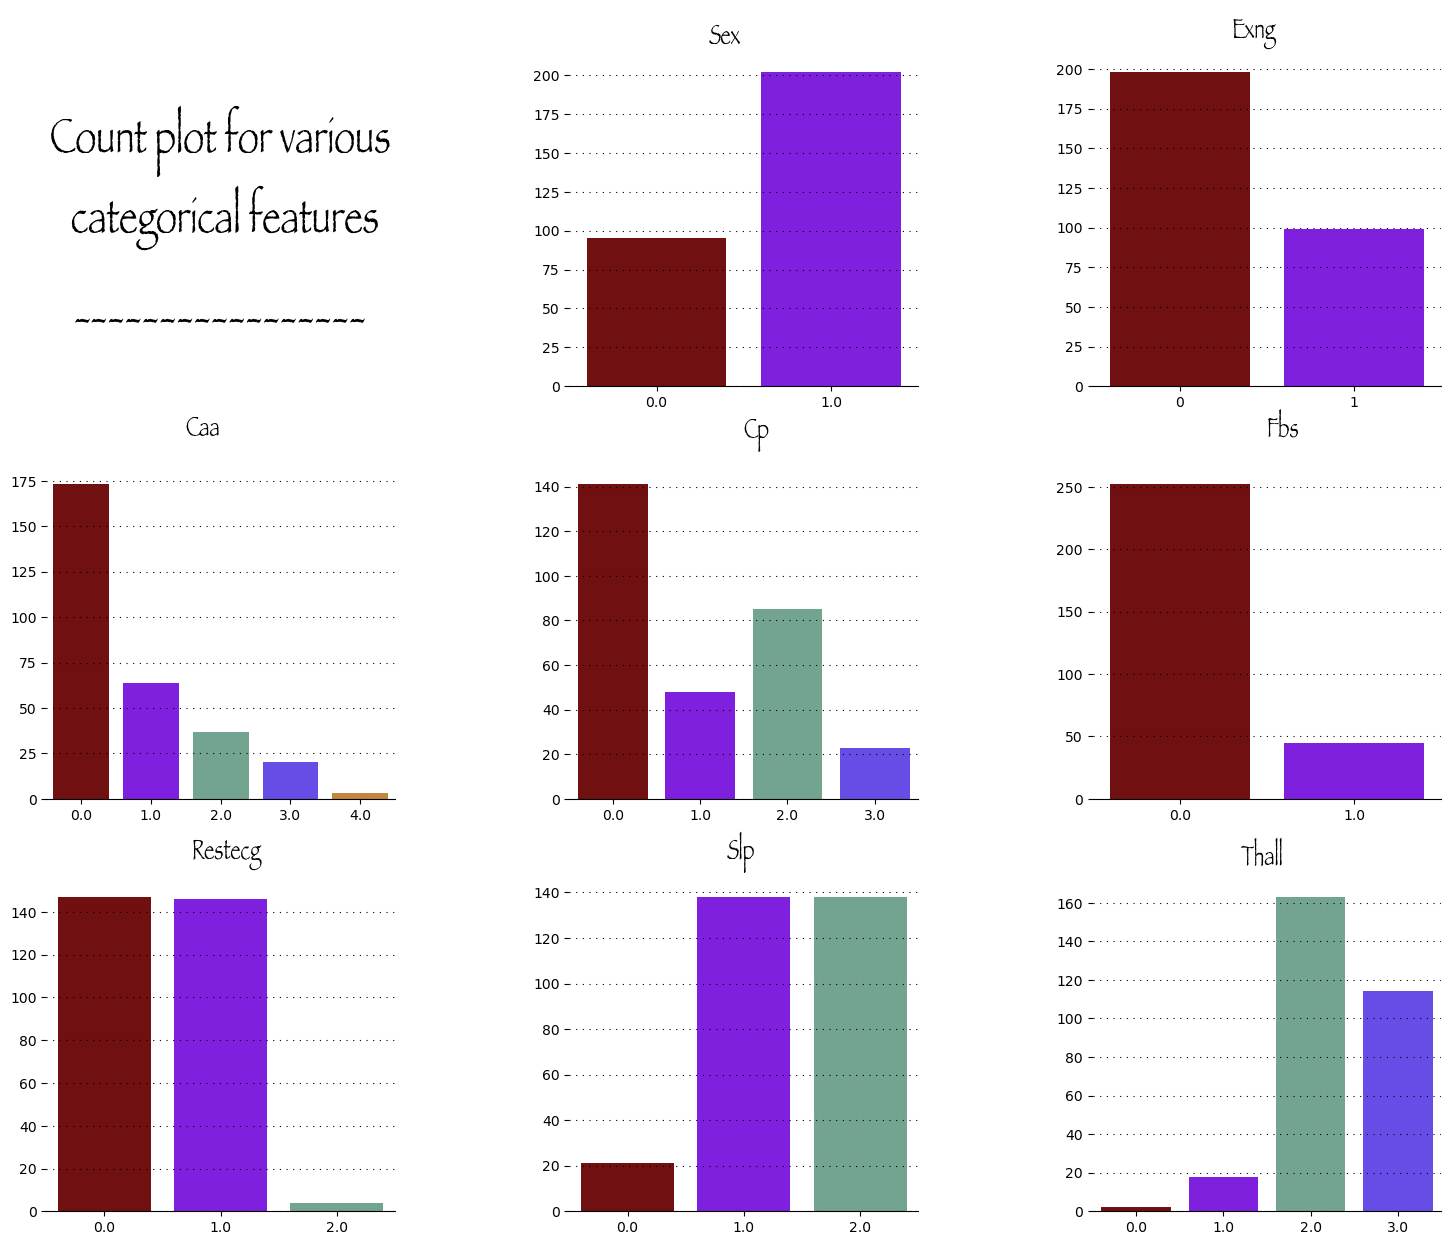

In [15]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=36, fontweight='bold',
         fontfamily='Papyrus',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

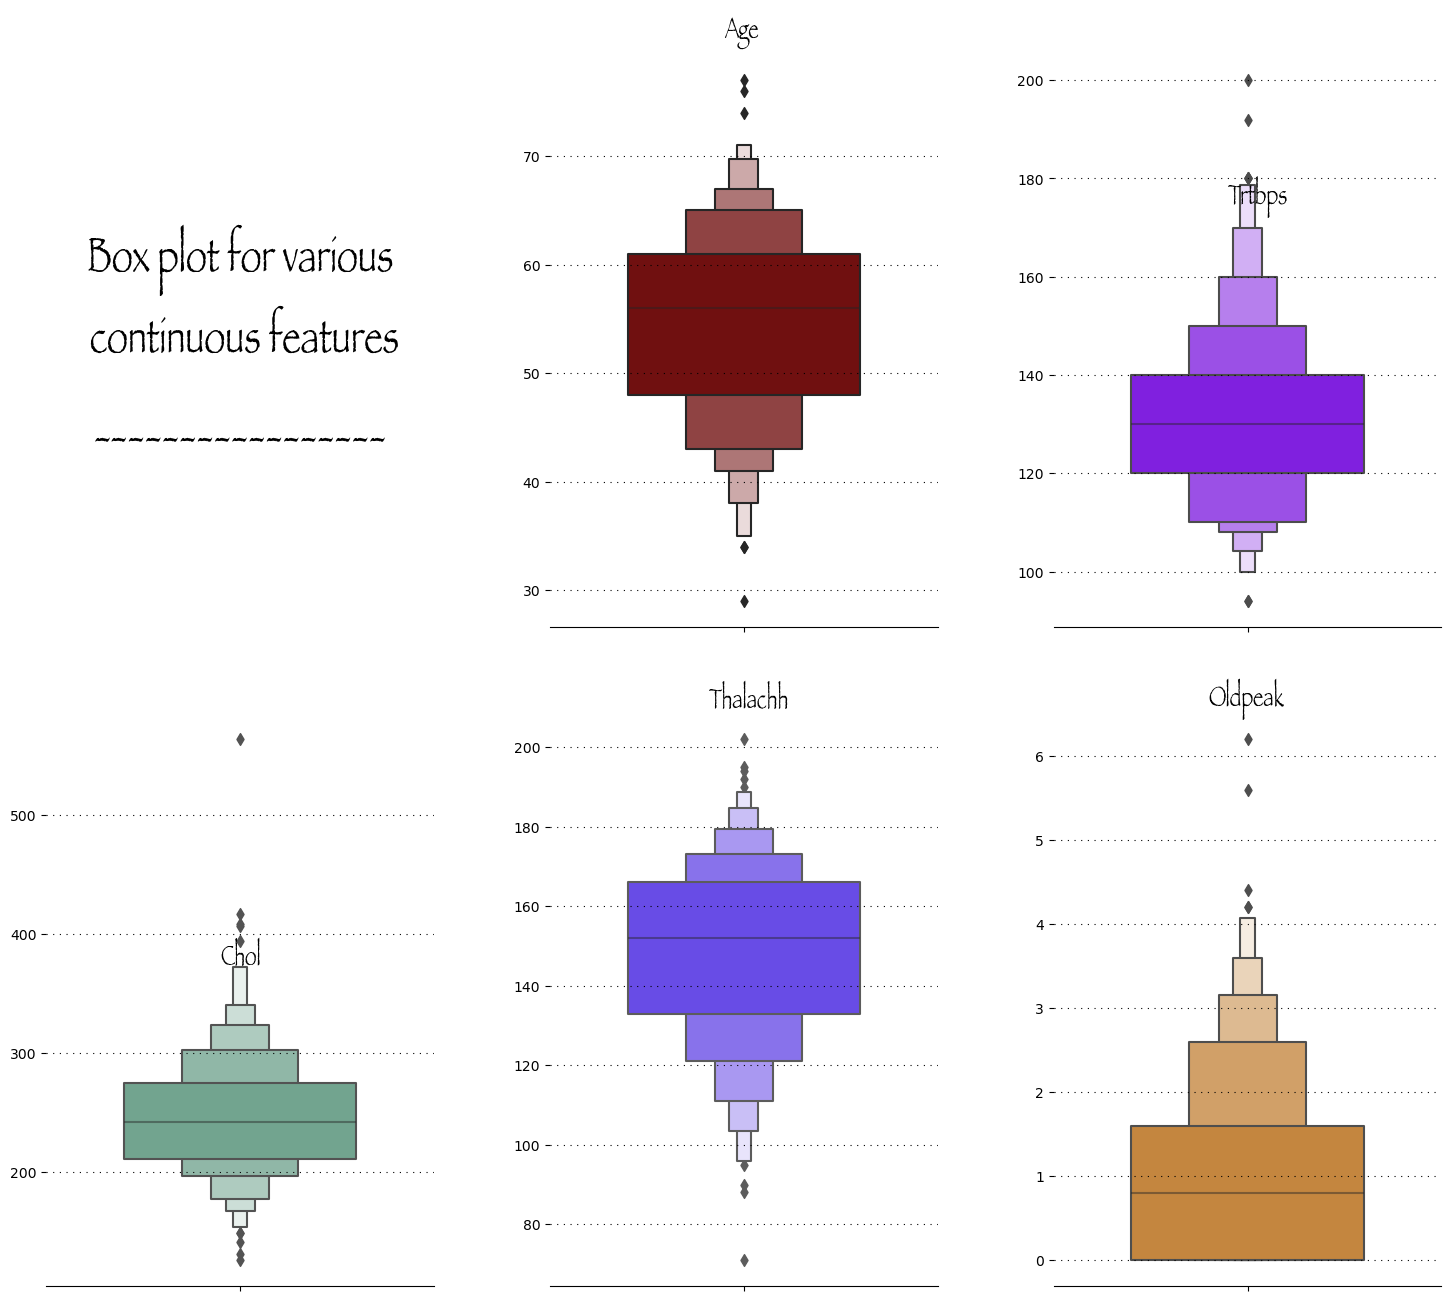

In [16]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=36, fontweight='bold',
         fontfamily='Papyrus',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.text(-0.05, 175, 'Trtbps', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 375, 'Chol', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.text(-0.09, 210, 'Thalachh', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

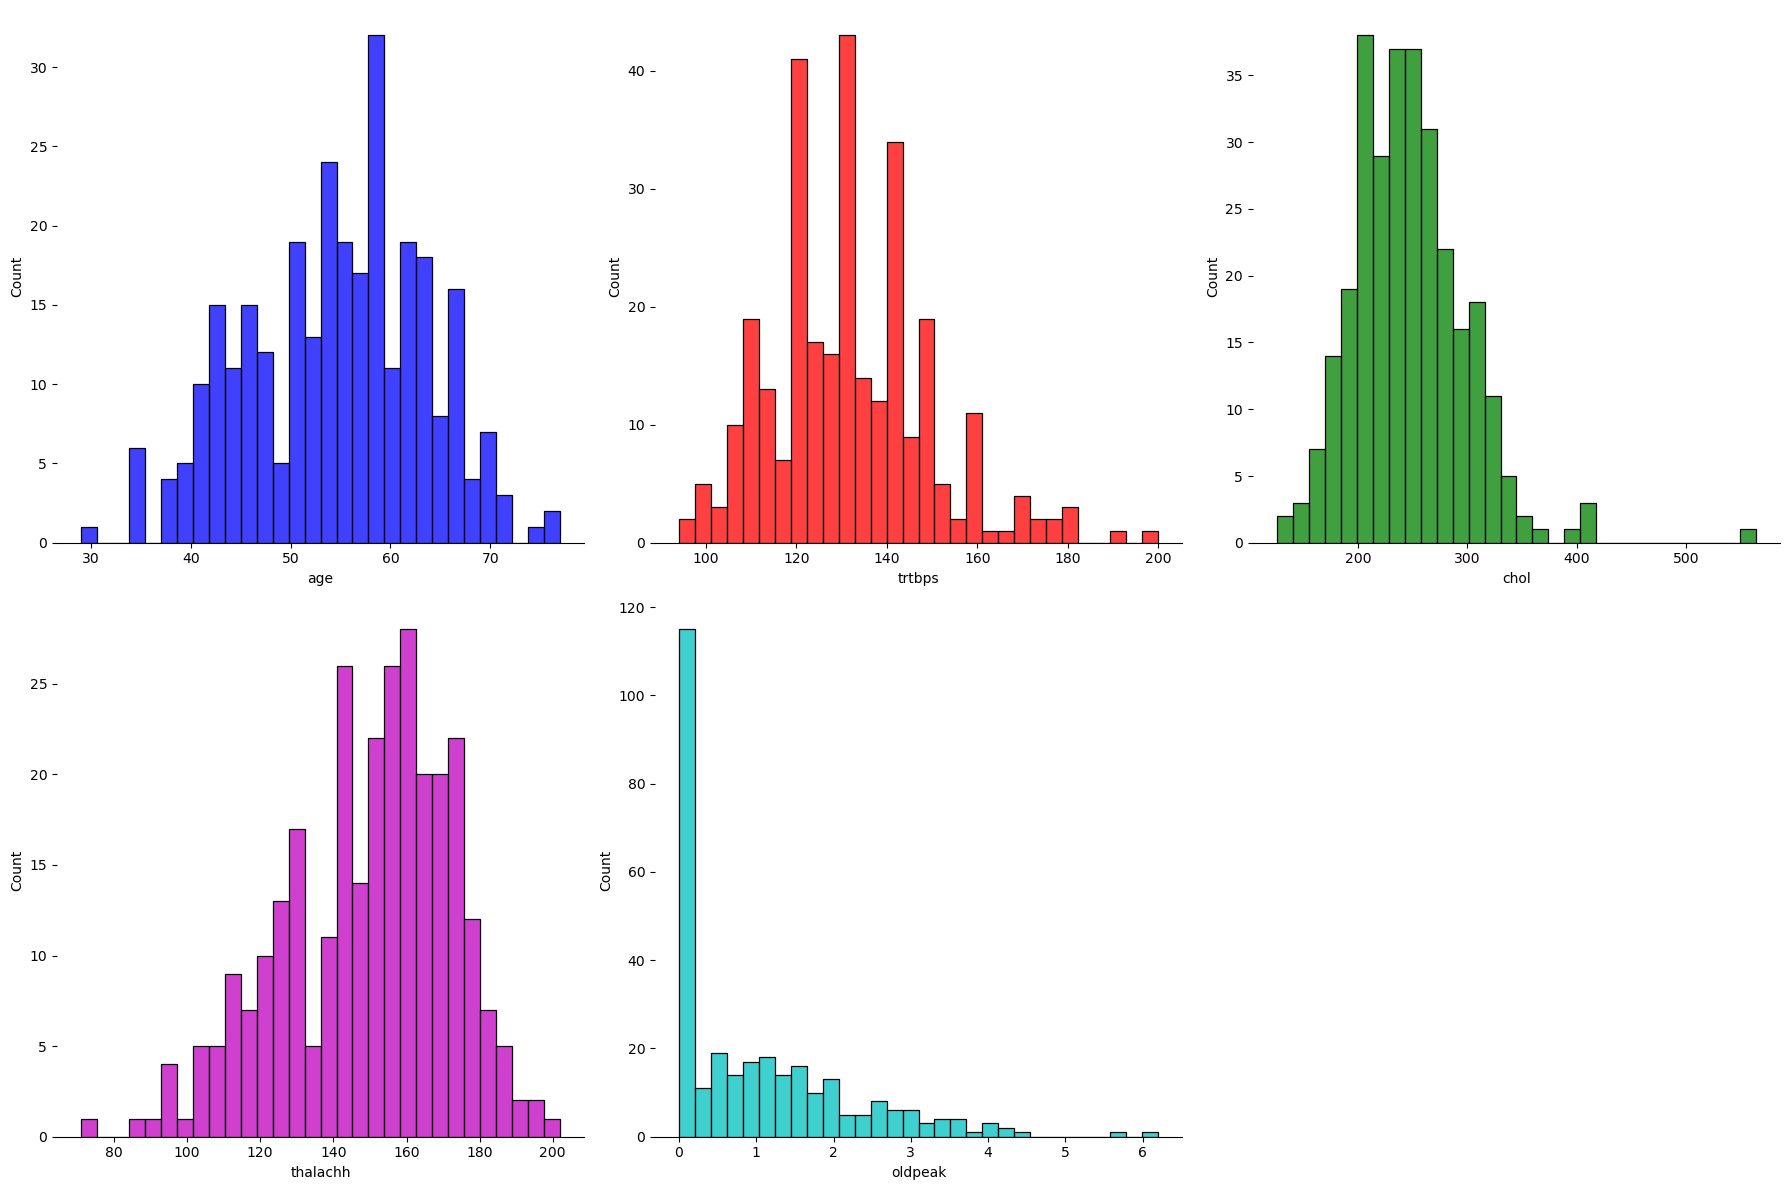

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure for numerical variables
f, axes_num = plt.subplots(2, 3, figsize=(18, 12), sharex=False)
sns.despine(left=True)

# Histograms for numerical variables
sns.histplot(df['age'], bins=30, kde=False, color="b", ax=axes_num[0, 0])
sns.histplot(df['trtbps'], bins=30, kde=False, color="r", ax=axes_num[0, 1])
sns.histplot(df['chol'], bins=30, kde=False, color="g", ax=axes_num[0, 2])
sns.histplot(df['thalachh'], bins=30, kde=False, color="m", ax=axes_num[1, 0])
sns.histplot(df['oldpeak'], bins=30, kde=False, color="c", ax=axes_num[1, 1])

# Hide the 6th subplot (as there are only 5 numerical variables)
axes_num[1, 2].set_visible(False)

plt.tight_layout()




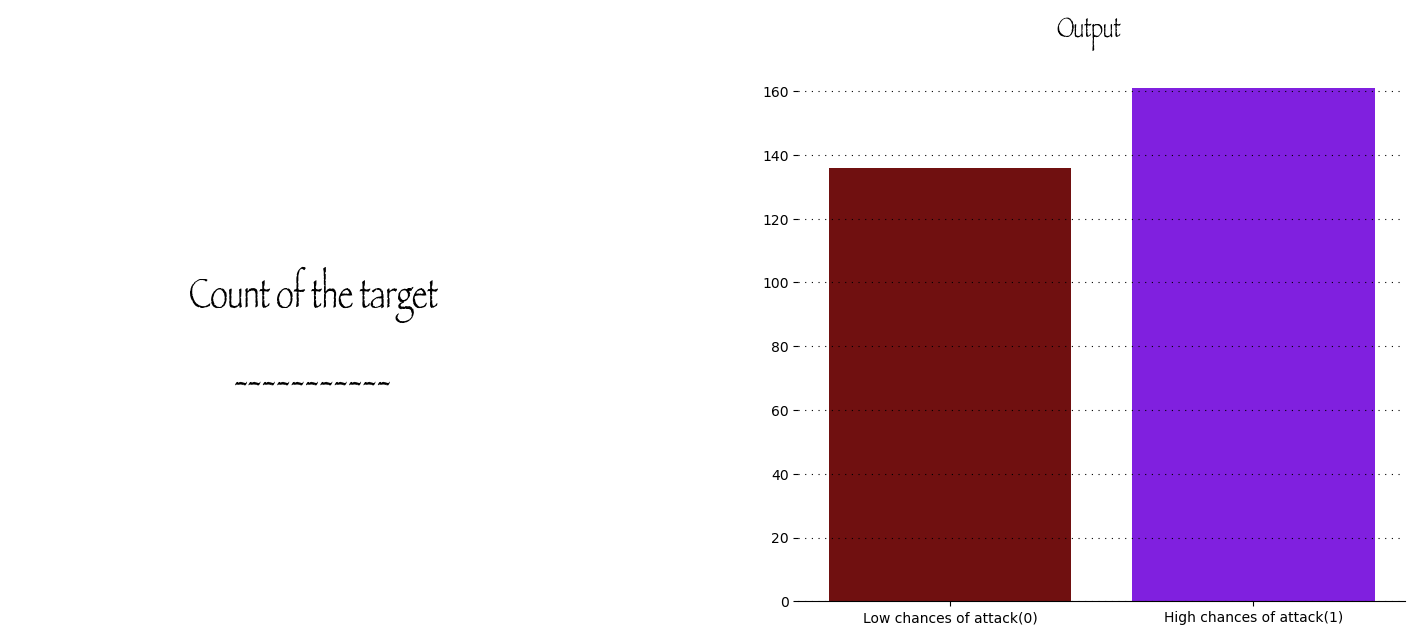

In [18]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 30,
        fontweight='bold',
        fontfamily='Papyrus',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

 3. **Multivariate Graphical/Nongraphical** <br>
Here we inspect the correlation between each pair of numeric variables.<br>
Our focus is of course, the first row (excluding first entry) enumerating the correlation coefficients for each of the predictors.

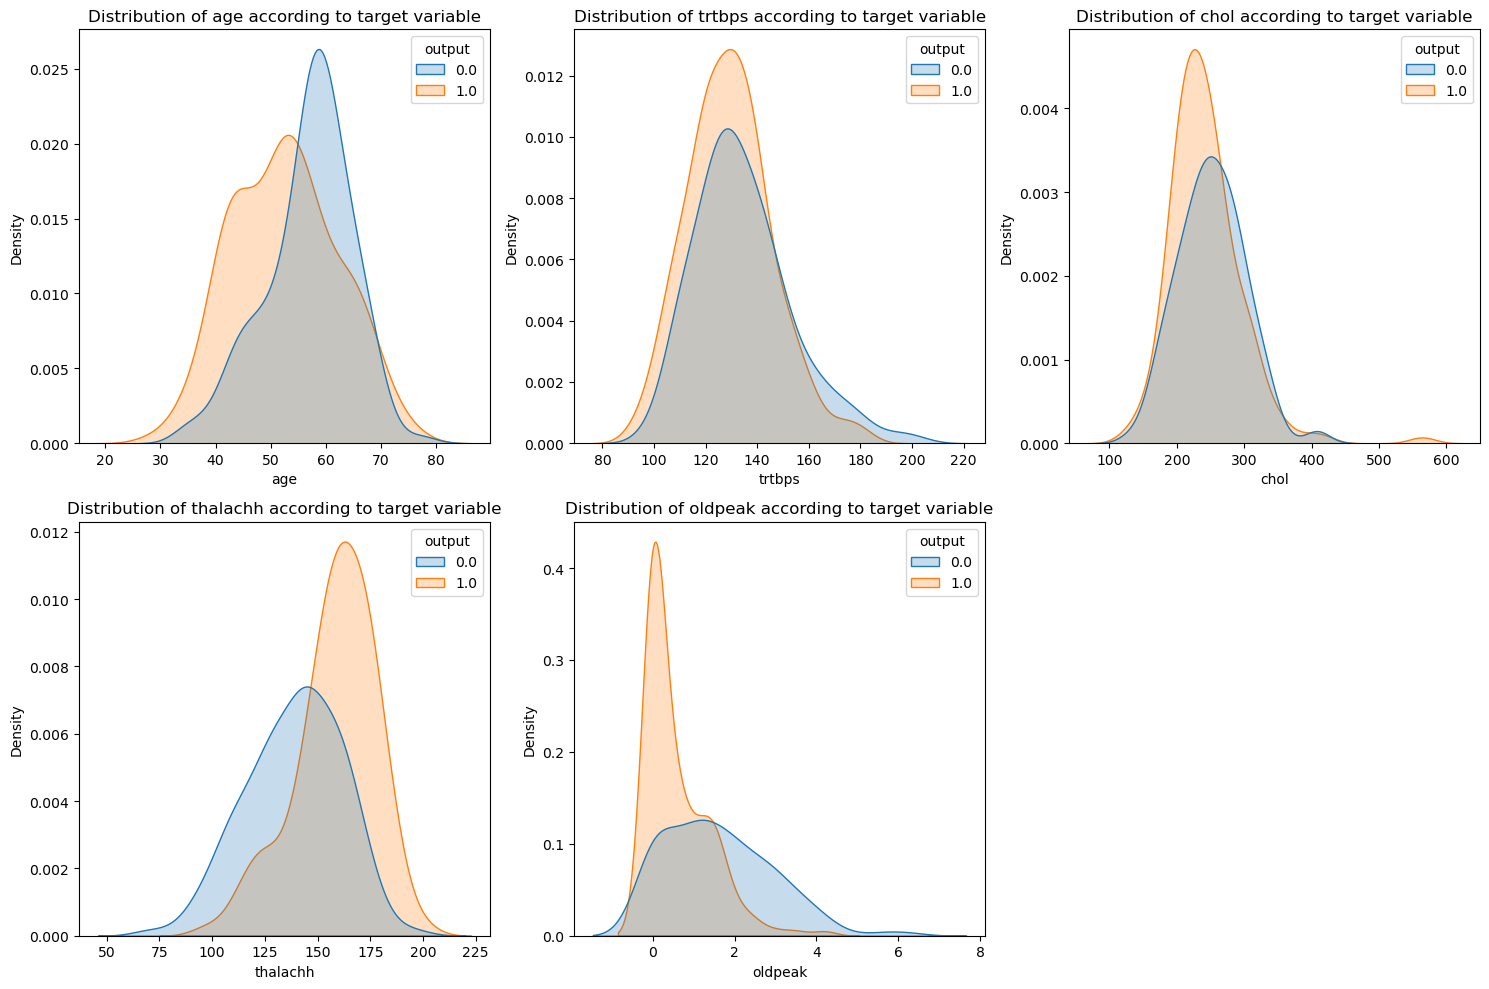

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataframe here
# df = pd.read_csv('your_dataset.csv')

# Define numerical and categorical variables
numerical_variables = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Set up the matplotlib figure for numerical variables
n_cols = 3  # number of columns in the grid
n_rows = int(len(numerical_variables) / n_cols) + (len(numerical_variables) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

for i, var in enumerate(numerical_variables):
    row = i // n_cols
    col = i % n_cols
    sns.kdeplot(data=df, x=var, hue="output", ax=axes[row, col], fill=True)
    axes[row, col].set_title(f'Distribution of {var} according to target variable')

# If the number of plots is not a multiple of n_cols, hide the empty subplots
for i in range(len(numerical_variables), n_rows * n_cols):
    axes.flat[i].set_visible(False)

plt.tight_layout()
plt.show()




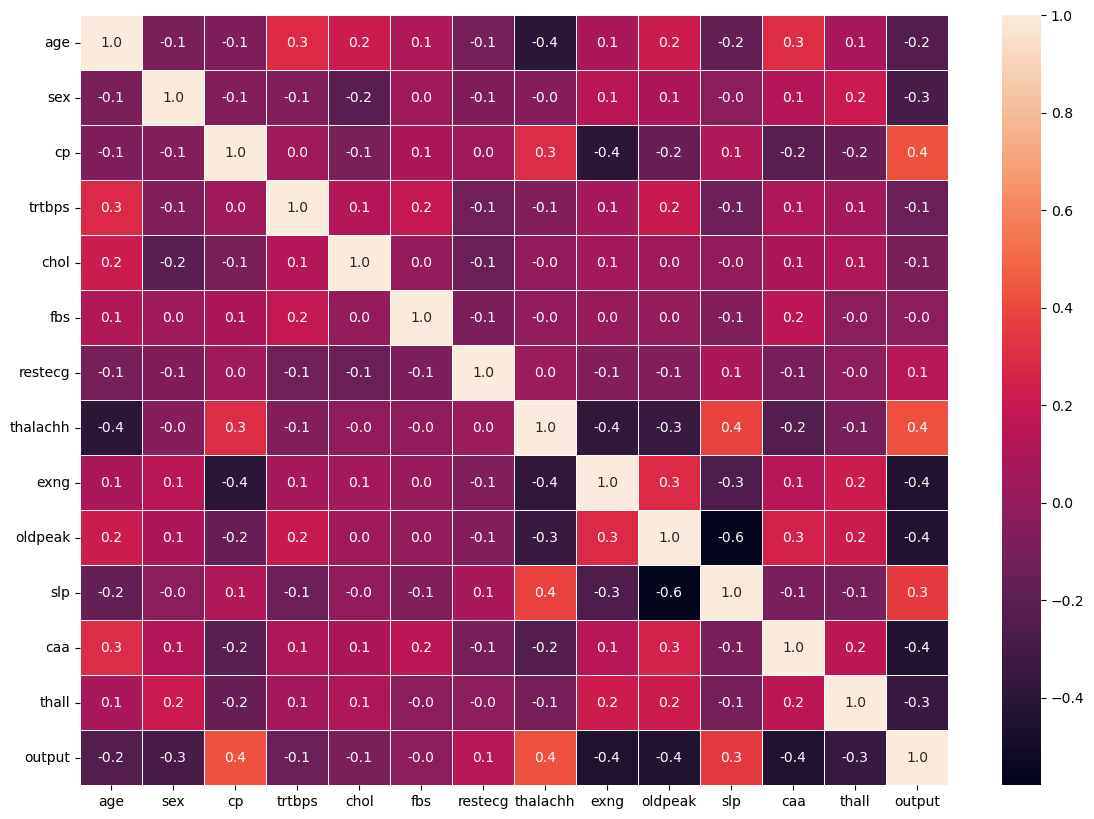

In [20]:
# Correlation Matrix


# Heatmap of the Correlation Matrix
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

We conclude from the heatmap the following:
1.
2. 
3. 

As such, we will primarily be using ____ for further numerical analysis.

### 2b. Categorical EDA
1. Univariate non-graphical
2. Univariate graphical
3. Multivariate graphical

1. **Univariate nongraphical** <br>
We inspect the numbers and proportions of each category in this section

In [21]:
# Get frequency count summary of categorical data
# Since describe() does not work well for categorical, we use value_counts()
# Convert counts to DataFrame for nicer display in Jupyter
categorical_summary = {var: df[var].value_counts() for var in categorical_vars}
categorical_summary = pd.DataFrame(categorical_summary)
categorical_summary


,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0.0,95.0,141.0,252.0,147.0,198.0,21.0,173,2.0,136.0
1.0,202.0,48.0,45.0,146.0,99.0,138.0,64,18.0,161.0
2.0,NaN,85.0,NaN,4.0,NaN,138.0,37,163.0,NaN
3.0,NaN,23.0,NaN,NaN,NaN,NaN,20,114.0,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN


2. **Univariate graphical** <br>
We inspect the visualised proportions using barplots, then the visualised distributions using boxplots.

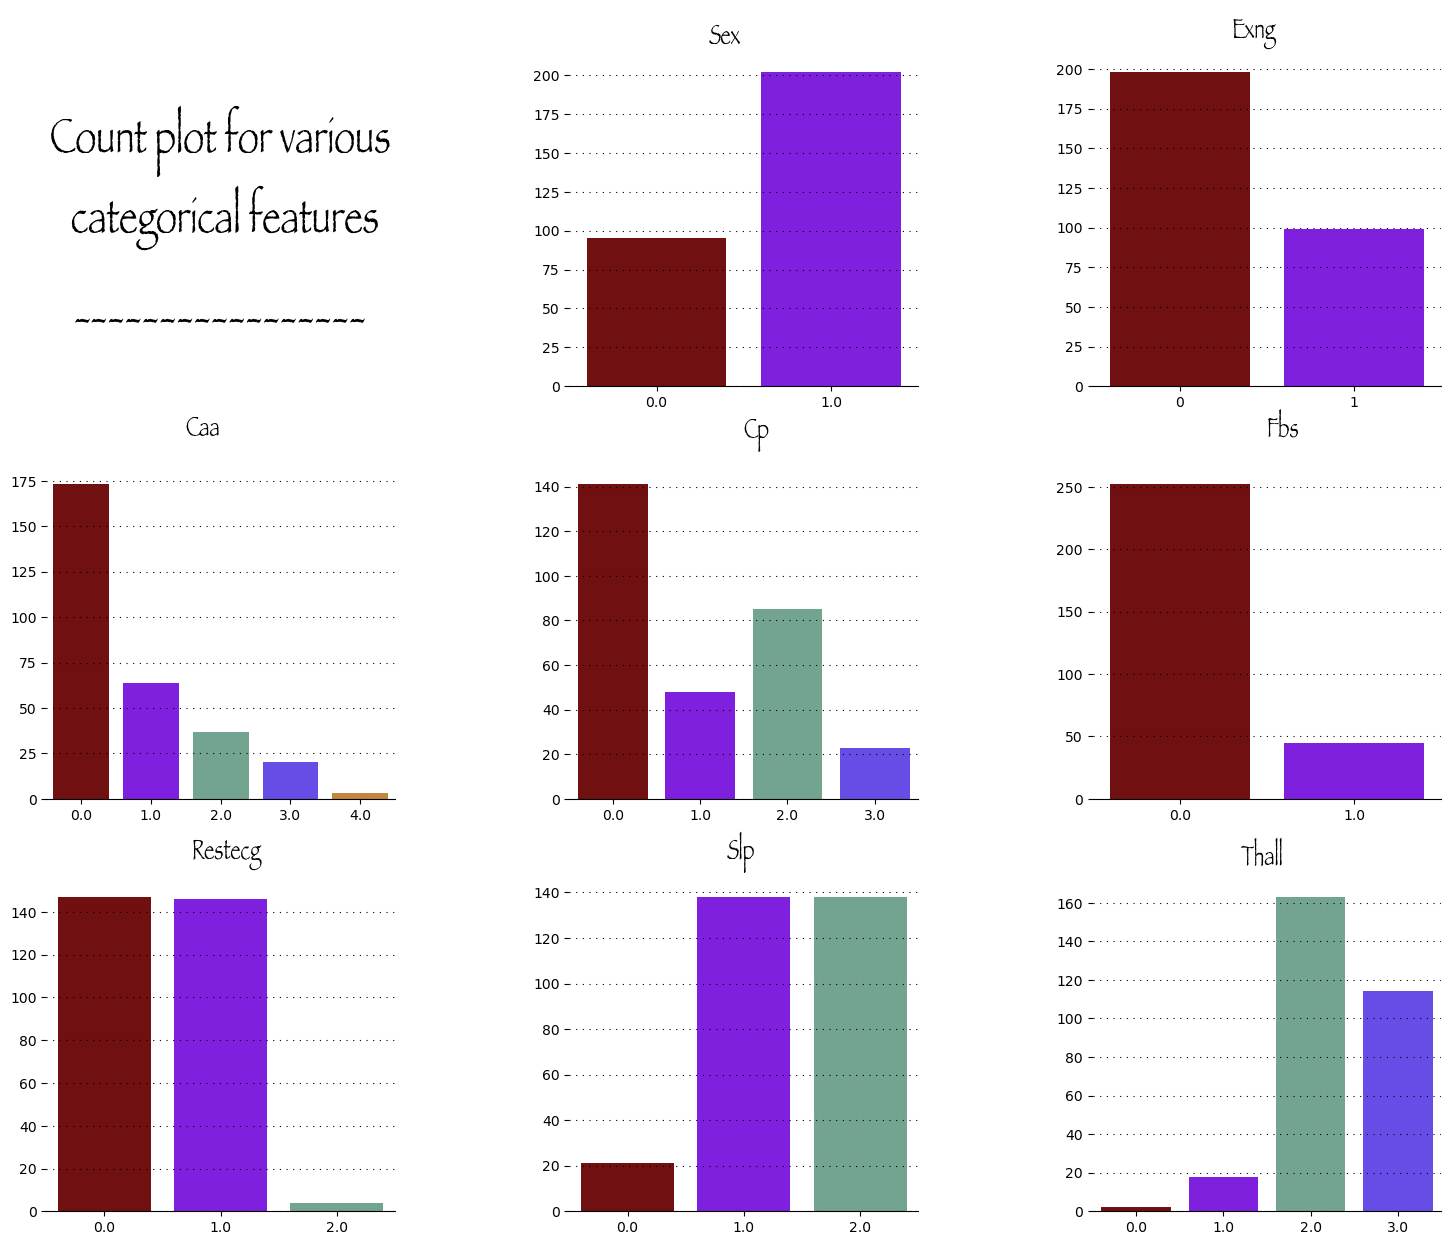

In [22]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=36, fontweight='bold',
         fontfamily='Papyrus',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

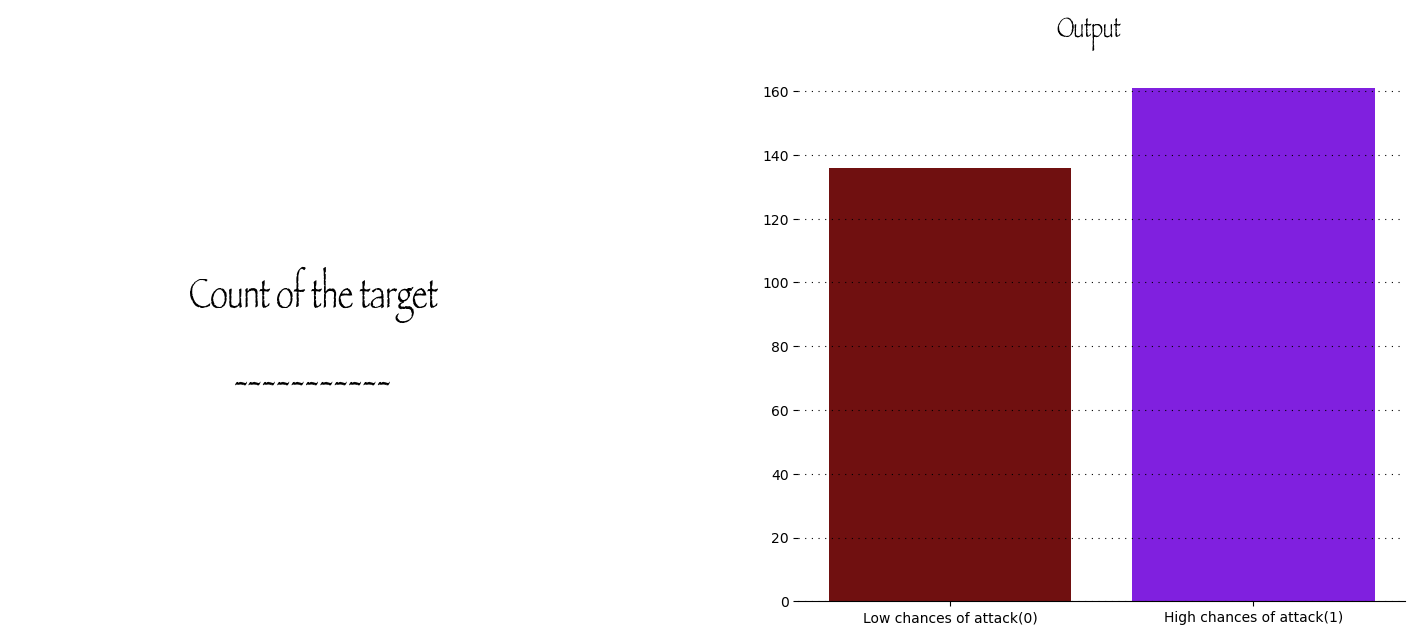

In [23]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 30,
        fontweight='bold',
        fontfamily='Papyrus',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

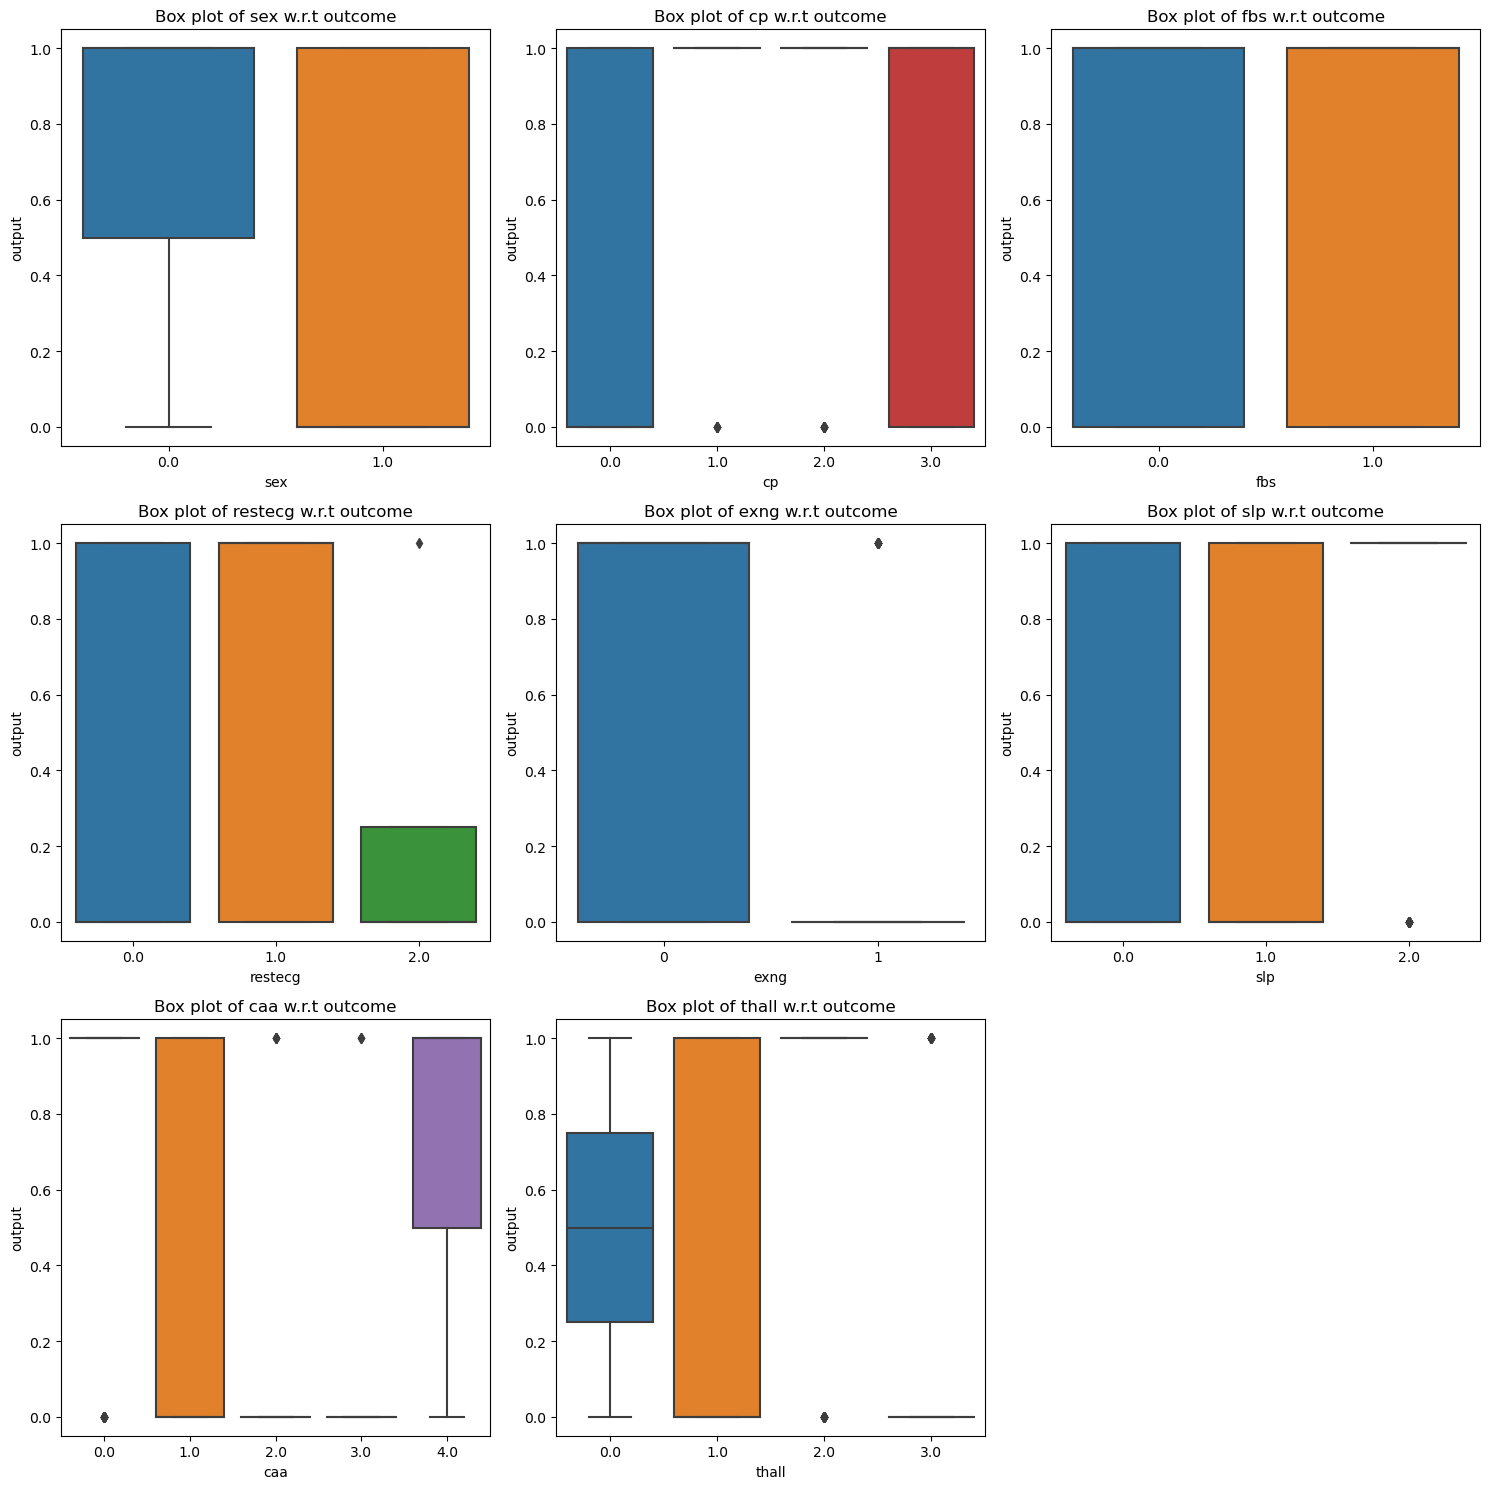

In [24]:
# Set up the matplotlib figure for categorical variables
n_rows = int(len(categorical_variables) / n_cols) + (len(categorical_variables) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

for i, var in enumerate(categorical_variables):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x=var, y='output', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Box plot of {var} w.r.t outcome')

# If the number of plots is not a multiple of n_cols, hide the empty subplots
for i in range(len(categorical_variables), n_rows * n_cols):
    axes.flat[i].set_visible(False)

plt.tight_layout()
plt.show()

### Bivariate data analysis with scatter plot

In [25]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

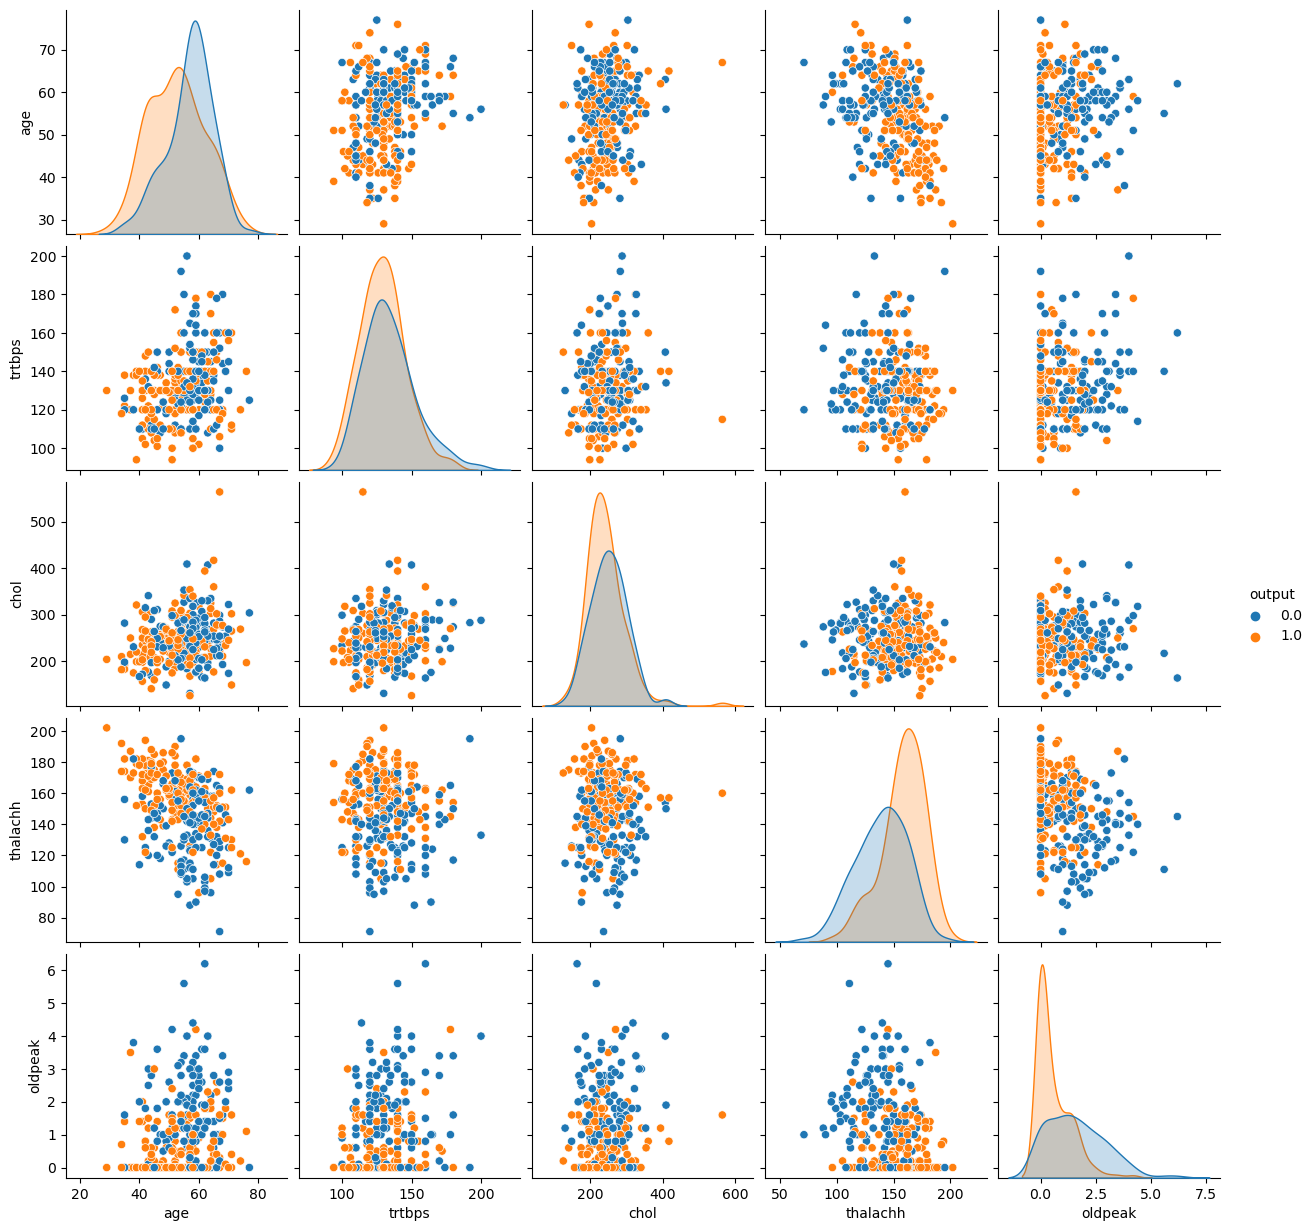

In [26]:
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

# Section 3: Machine Learning

## Modeling


### Encoding Categorical Columns
![TW5m0aJ.png](attachment:08646436-dd1d-4179-bd0d-9257c5ea4b71.png)

In [27]:
df1 = df.copy()

In [28]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first = True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,exng_1,slp_1.0,slp_2.0,caa_1.0,caa_2.0,caa_3.0,caa_4.0,thall_1.0,thall_2.0,thall_3.0
0,43.0,115,303.0,181.0,1.2,1.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,62.0,124,209.0,163.0,0.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,50.0,150,243.0,128.0,2.6,0.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,54.0,132,288.0,159.0,0.0,1.0,0,1,0,0,...,1,0,1,1,0,0,0,0,1,0
5,52.0,134,201.0,158.0,0.8,1.0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [29]:
# 
X = df1.drop(["output"], axis = 1)
y = df1[["output"]]

In [30]:
scaler = StandardScaler()
scaler

StandardScaler()

In [31]:
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1.0,cp_1.0,cp_2.0,cp_3.0,fbs_1.0,...,exng_1,slp_1.0,slp_2.0,caa_1.0,caa_2.0,caa_3.0,caa_4.0,thall_1.0,thall_2.0,thall_3.0
0,-1.281991,-0.941312,1.086859,1.381043,0.129834,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0.832676,-0.430320,-0.727909,0.595026,-0.900738,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,-0.502903,1.045881,-0.071504,-0.933340,1.332167,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,-0.057710,0.023896,0.797268,0.420356,-0.900738,0,1,0,0,1,...,1,0,1,1,0,0,0,0,1,0
5,-0.280307,0.137450,-0.882358,0.376688,-0.213690,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [50]:
from sklearn.model_selection import GridSearchCV, KFold

# Logistic Regression model
logreg = LogisticRegression()

# Define the hyperparameters and their possible values
parameters = {
    'penalty': ['l1', 'l2'],   # Regularization types
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Algorithms that support both l1 and l2 penalties
}

# Define the KFold cross-validator
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# GridSearchCV with KFold
lr_searcher = GridSearchCV(logreg, parameters, cv=kf, scoring='accuracy')

# Fit on the training data
lr_searcher.fit(X, y)

# The best hyperparameters from GridSearchCV
print("Best parameters found: ", lr_searcher.best_params_)


Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [51]:
cv_results = lr_searcher.cv_results_
print(f'CV Accuracy scores for each fold: {cv_results["mean_test_score"]}')
print(f'CV Accuracy mean: {np.max(cv_results["mean_test_score"])}')


CV Accuracy scores for each fold: [0.53896552 0.53896552 0.71436782 0.70436782 0.68413793 0.68413793
 0.75494253 0.70770115 0.81206897 0.70103448 0.82850575 0.70770115
 0.83850575 0.70770115 0.83862069 0.70770115 0.83517241 0.70770115
 0.83517241 0.70770115 0.83183908 0.70770115 0.83183908 0.70770115]
CV Accuracy mean: 0.8386206896551724


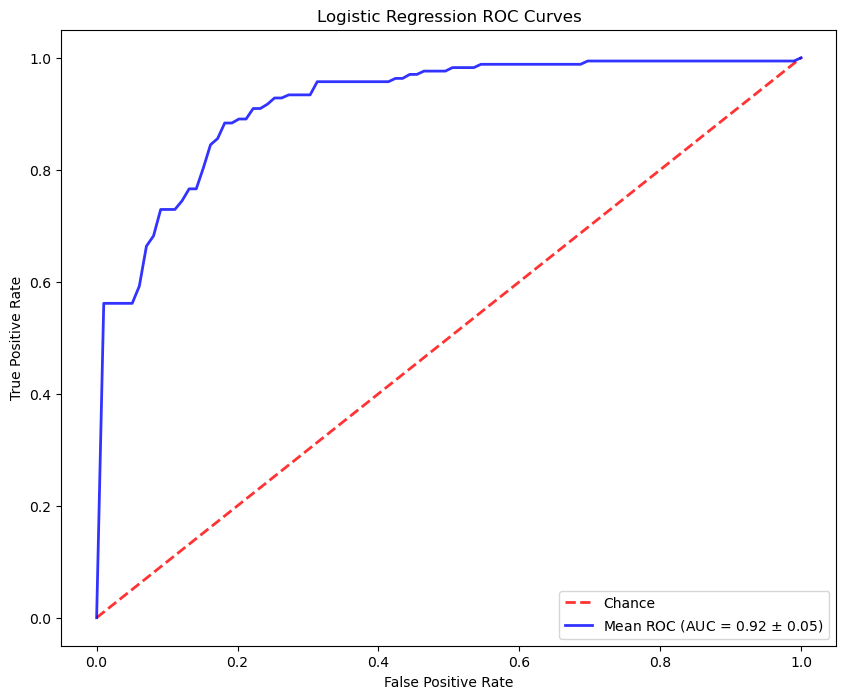

In [33]:


# Set up lists to store results
tprs = []
fprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
confusion_matrices = []

kf = KFold(n_splits=10, random_state=42, shuffle=True)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    # ROC Curve calculations
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Plotting each fold's ROC Curve
plt.figure(figsize=(10, 8))
for i, (tpr, fpr, roc_auc) in enumerate(zip(tprs, fprs, aucs)):
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curves')
plt.legend(loc="lower right")
plt.show()




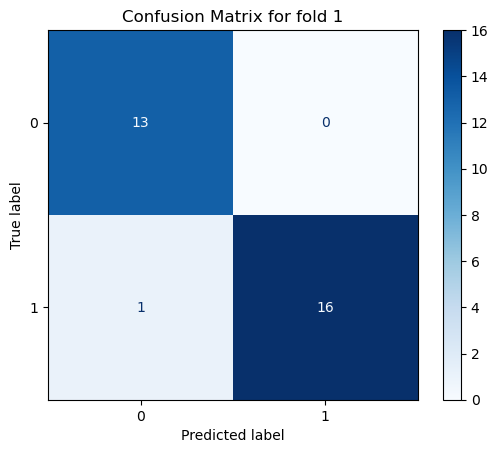

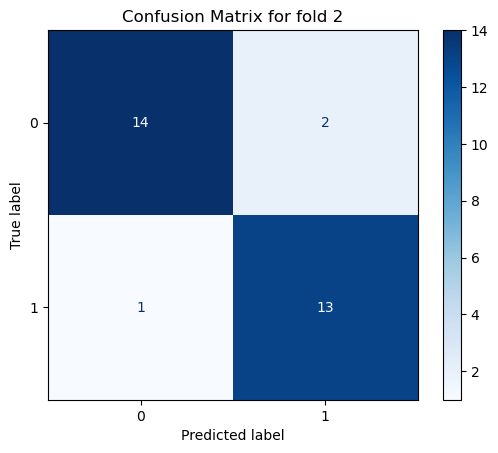

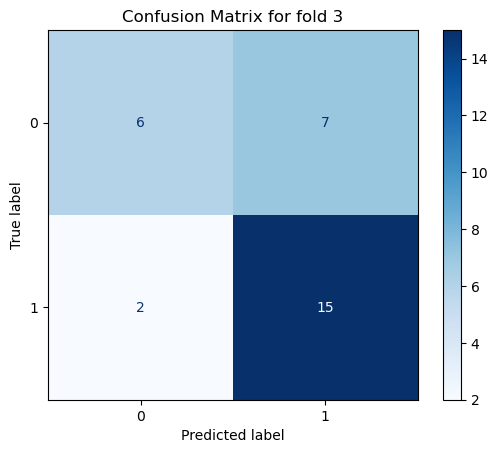

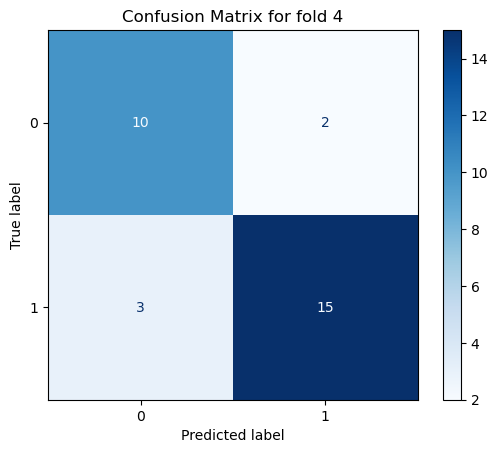

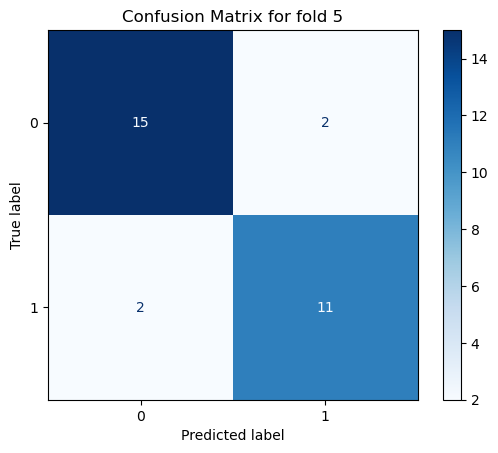

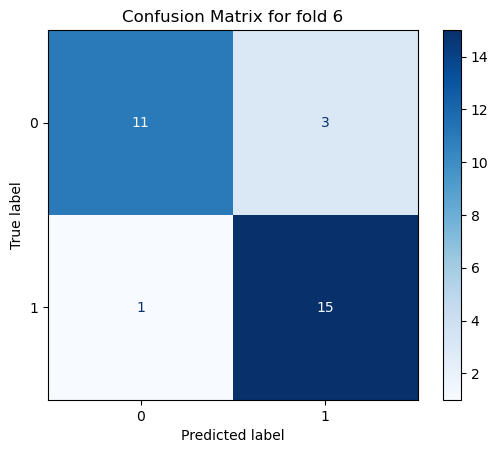

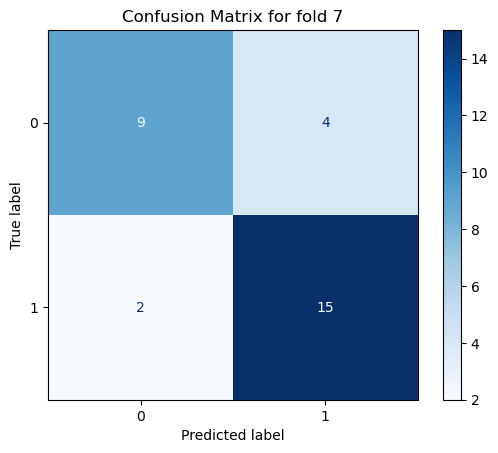

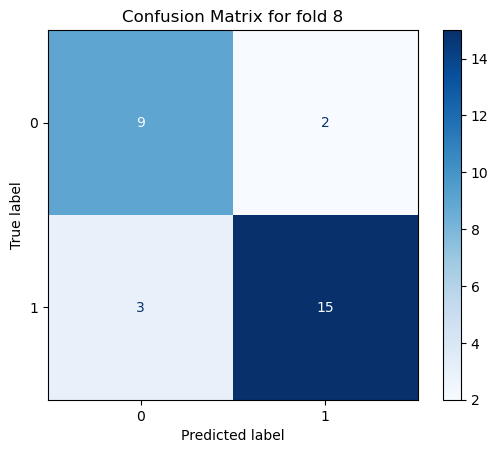

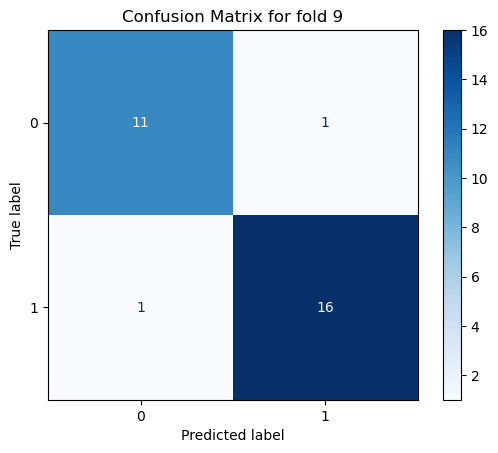

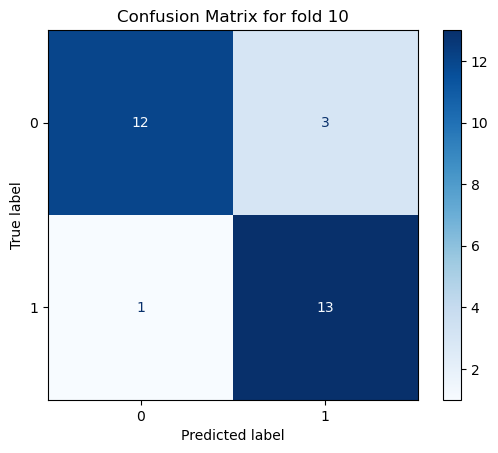

In [34]:


# Displaying confusion matrices for each fold
for i, cm in enumerate(confusion_matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for fold {i+1}')
    plt.show()

Decision Tree Test Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.79      0.81        42
         1.0       0.82      0.88      0.85        48

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



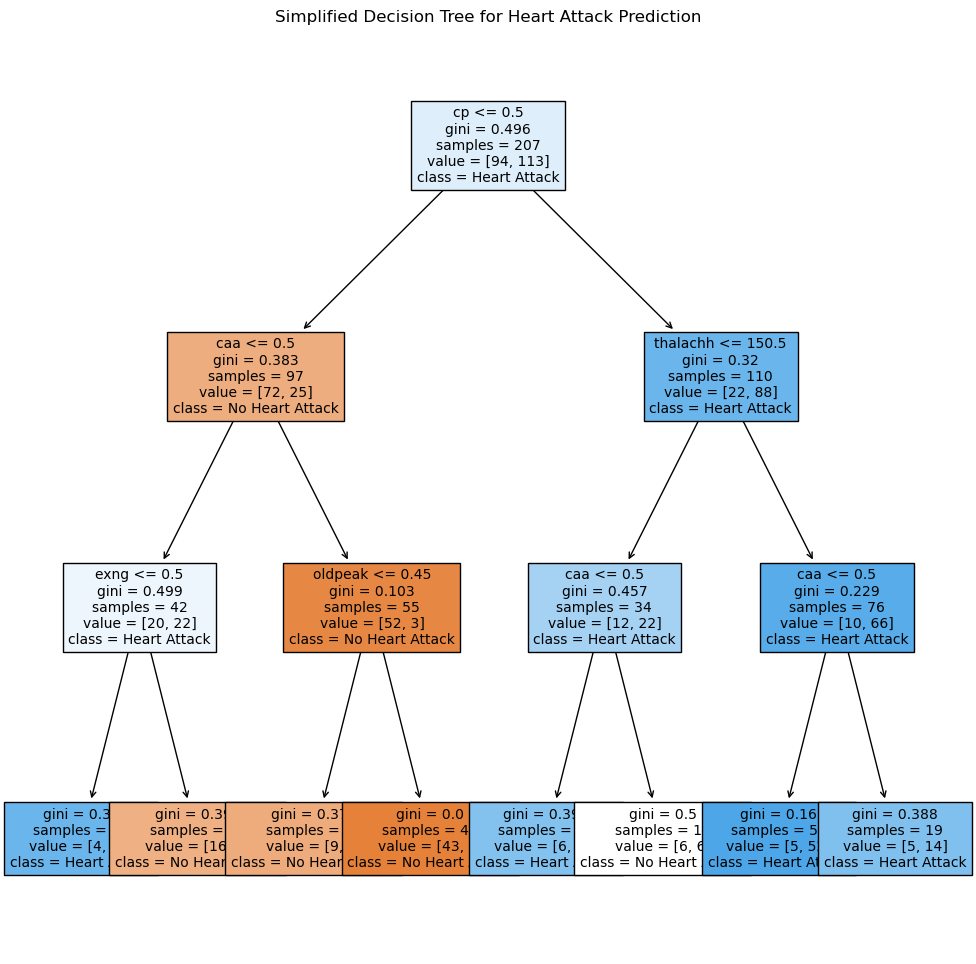

In [35]:
# Split the data into features and target
X = df.drop('output', axis=1)  # 'output' is the column to predict
y = df['output']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature selection
selector = SelectKBest(chi2, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Initialize the Decision Tree Classifier with parameters to limit depth and leaf size
tree = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=10)

# Train the model on selected features
tree.fit(X_train_selected, y_train)

# Predicting the test set results
y_pred = tree.predict(X_test_selected)

# Model Evaluation
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Extract the selected feature names for visualization
selected_features = [X.columns[i] for i in selector.get_support(indices=True)]

# Plot the decision tree
plt.figure(figsize=(12,12))
plot_tree(tree, filled=True, feature_names=selected_features, class_names=['No Heart Attack', 'Heart Attack'], fontsize=10)
plt.title('Simplified Decision Tree for Heart Attack Prediction')
plt.show()

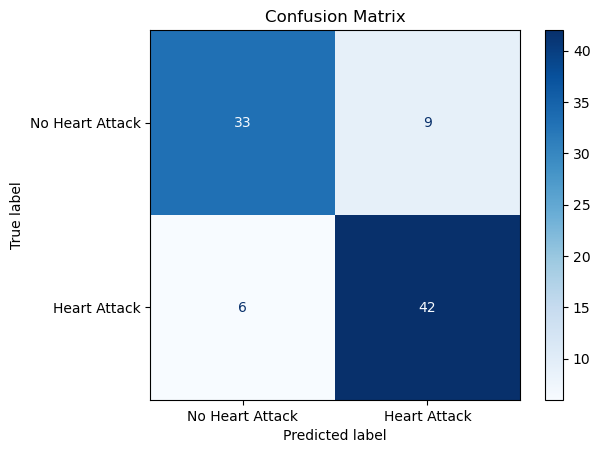

True Positive Rate: 0.875
False Positive Rate: 0.21428571428571427


In [36]:
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Attack', 'Heart Attack'])

# Use the plot function with a colormap
disp.plot(cmap=plt.cm.Blues)

# Add a title and show the plot
plt.title('Confusion Matrix')
plt.show()
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(f"True Positive Rate: {tpr}")
print(f"False Positive Rate: {fpr}")

Random Forest Test Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85        42
         1.0       0.85      0.92      0.88        48

    accuracy                           0.87        90
   macro avg       0.87      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



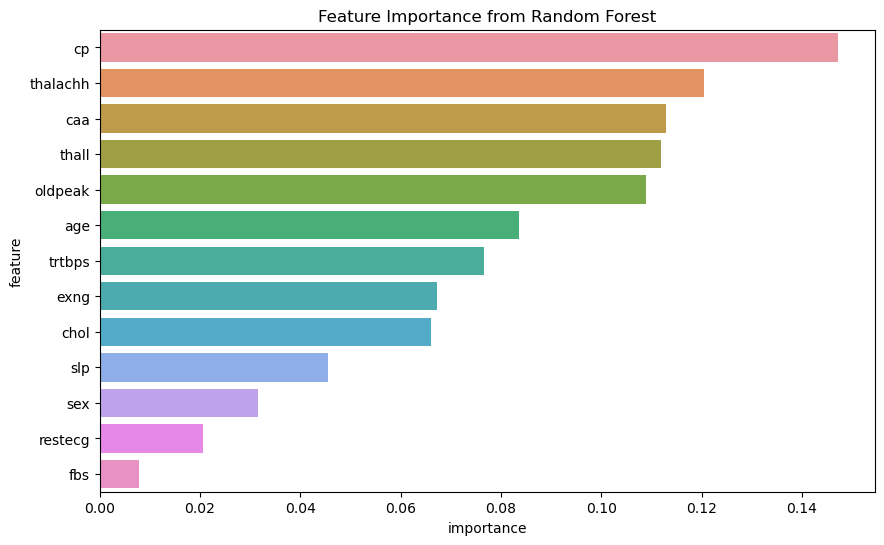

In [37]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=3)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importances
importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
importances = importances.sort_values('importance', ascending=False)

# Plotting Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importance from Random Forest')
plt.show()

In [47]:
from scipy.stats import ttest_ind

# Assuming 'output' is 1 for heart attacks and 0 for no heart attack
for factor in ['cp', 'caa', 'age', 'thall', 'oldpeak', 'chol', 'trtbps']:
    group1 = df[df['output'] == 1][factor]
    group2 = df[df['output'] == 0][factor]
    
    # Perform the t-test
    t_stat, p_val = ttest_ind(group1, group2)
    
    # Display the results
    print(f"T-test for {factor}:")
    print(f"T-statistic: {t_stat}, P-value: {p_val}")
    
    # Conclusion based on p-value
    if p_val < 0.05:
        print(f"There is a significant difference in {factor} between the groups.")
    else:
        print(f"There is no significant difference in {factor} between the groups.")
    print("\n")  # Newline for readability


T-test for cp:
T-statistic: 8.121985296360494, P-value: 1.264081794673568e-14
There is a significant difference in cp between the groups.


T-test for caa:
T-statistic: -8.46984750432763, P-value: 1.1785261018535559e-15
There is a significant difference in caa between the groups.


T-test for age:
T-statistic: -4.223621104105181, P-value: 3.2066518595038556e-05
There is a significant difference in age between the groups.


T-test for thall:
T-statistic: -6.220013181500211, P-value: 1.697958651590611e-09
There is a significant difference in thall between the groups.


T-test for oldpeak:
T-statistic: -8.29888699552826, P-value: 3.810380465217258e-15
There is a significant difference in oldpeak between the groups.


T-test for chol:
T-statistic: -1.4761135993220216, P-value: 0.14097999540125625
There is no significant difference in chol between the groups.


T-test for trtbps:
T-statistic: -2.546581825246758, P-value: 0.01138647386046898
There is a significant difference in trtbps betwee